<a href="https://colab.research.google.com/github/rajeevrpandey/Regression-MLP-for-California-Housing-Price-Prediction/blob/main/Regression_MLP_for_California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()
# It is a tabular dataset with 8 numerical features and 20640 samples.
# Here, housing is a "Bunch" object (a dictionary-like structure in sklearn).
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# **feature_names:**

Feature:	Description

MedInc:	Median income in the district.

HouseAge:	Average house age in the district.

AveRooms:	Average number of rooms per household.

AveBedrms:	Average number of bedrooms per household.

Population:	Total population of the district.

AveOccup:	Average number of occupants per household.

Latitude:	Latitude coordinate of the district.

Longitude:	Longitude coordinate of the district.




In [2]:
# Split the dataset into training, validation, and test sets (80-10-10 split)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
print(type(X_train), X_train.shape) # 2D NumPy array of shape, containing the features
print(type(y_train), y_train.shape) # 1D NumPy array of shape, containing the median house value

<class 'numpy.ndarray'> (11610, 8)
<class 'numpy.ndarray'> (11610,)


In [3]:
# Standardize the features using StandardScaler
# It transforms each feature to have zero mean and unit variance.
# The same scaling is applied to training, validation, and test sets.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_valid = scaler.transform(X_valid)  # Transform validation data
X_test = scaler.transform(X_test)  # Transform test data


In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [5]:
# Define the MLP model
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting by randomly deactivating 20% of the neurons in each training step
    keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)  # Output layer for regression, output is a single continuous value (house price)
])
# L2 Regularization penalizes large weights, making the model simpler and more generalizable
# Here we are adding 0.01 times the sum of squared weights to the loss function

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4))


In [7]:
# Implement early stopping and Reduce learning rate when validation loss plateaus
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",      # Track validation loss
    patience=15,             # Stop after 15 epochs with no improvement
    restore_best_weights=True,  # Keep the best model weights
    min_delta=1e-4,          # Ignore small improvements
    verbose=1                # Display messages when stopping
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",  # Monitors the validation loss
    factor=0.5,  # Reduce learning rate by half when triggered
    patience=5,  # Wait 5 epochs before reducing LR
    min_lr=1e-6,  # Do not reduce learning rate below 1e-6
    verbose=1  # Display messages when reducing learning rate
)

In [8]:
# Train the model with early stopping
history = model.fit(
    X_train, y_train,      # Training data (features & target)
    epochs=100,            # Train for 100 epochs (iterations over dataset)
    batch_size=64,         # Process data in mini-batches of 64 samples
    validation_data=(X_valid, y_valid),  # Validate model on unseen data
    callbacks=[early_stopping, lr_scheduler],  # Apply early stopping & LR scheduler
    verbose=1              # Print training progress
)
# "history" is an object that stores the training progress of the model

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 6.2683 - val_loss: 7.0818 - learning_rate: 1.0000e-04
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8606 - val_loss: 8.9801 - learning_rate: 1.0000e-04
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.5843 - val_loss: 9.5432 - learning_rate: 1.0000e-04
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0515 - val_loss: 8.1157 - learning_rate: 1.0000e-04
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7818 - val_loss: 7.1096 - learning_rate: 1.0000e-04
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6864 - val_loss: 6.2619 - learning_rate: 1.0000e-04
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5924 - val_loss: 5.1858 - learning_rate: 1.0000e-04
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5307 - val_loss: 4.4944 - learning_rate: 1.0000e-04
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4849 - val_loss:

In [9]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse_test:.4f}")


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7201
Test MSE: 0.7153


In [10]:
# Make predictions on new data (first 3 test samples)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("Predictions:", y_pred.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predictions: [0.78124076 1.6280017  3.362279  ]


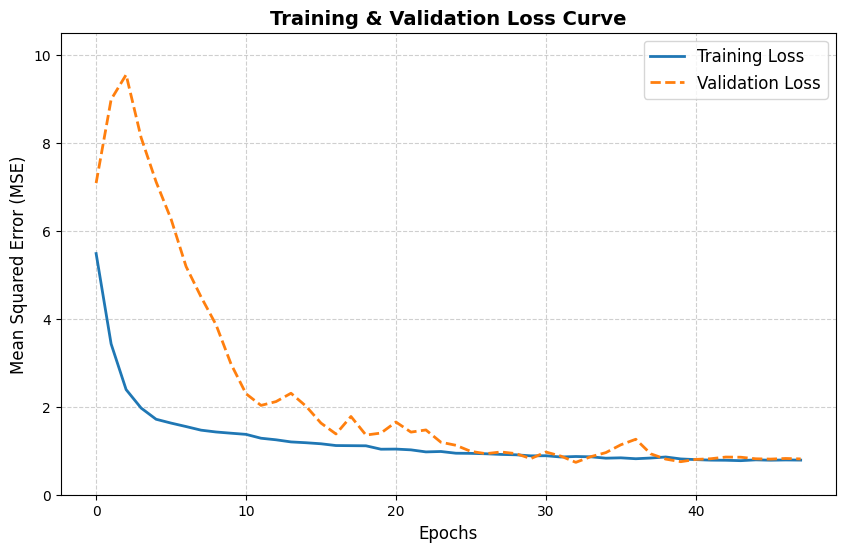

In [11]:
# Plot the training history with improved visualization
plt.figure(figsize=(10, 6))
history_df = pd.DataFrame(history.history)  # Converting into DataFrame for easier plotting

# Plot training & validation loss
plt.plot(history_df.index, history_df["loss"], label="Training Loss", linewidth=2)
plt.plot(history_df.index, history_df["val_loss"], label="Validation Loss", linestyle="dashed", linewidth=2)

# Formatting the plot
plt.grid(True, linestyle="--", alpha=0.6) # Adds a dotted grid to improve readability, alpha=0.6 makes the grid semi-transparent.
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Training & Validation Loss Curve", fontsize=14, fontweight="bold")
plt.legend(fontsize=12)
plt.ylim(0, max(history_df["loss"].max(), history_df["val_loss"].max()) * 1.1)  # Dynamically adjusts the y-axis limit based on the highest loss value

# Show the plot
plt.show()
